## **无重采样**

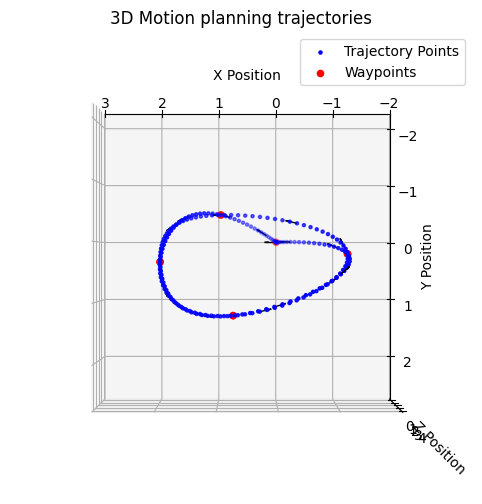

In [11]:
import os
import sys

# 将上一级目录添加到 sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

import tools
import pandas as pd


cm = 0.01
HOVER_HEIGHT  = 60*cm  
Trajectory = tools.Trajectory_Class('../../position_records.csv')

from planning import MotionPlanner3D
Planner = MotionPlanner3D(Gate_points = Trajectory.point_list,
                          time_gain = 3.0, #FF0000
                          speed_limit =4.0
                          )



# print(Planner.result_traj_vel_max)
# test_planner.plot_continuous(None, test_planner.waypoints, test_planner.trajectory_setpoints)
Planner.plot_discrete(None, Planner.waypoints, Planner.trajectory_setpoints)



## **有重采样**

210
None


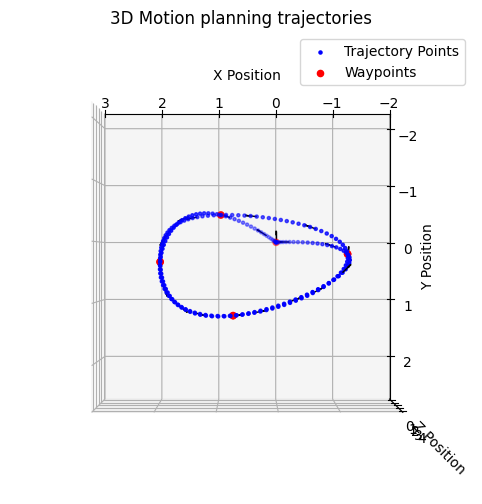

In [9]:
import os
import sys

# 将上一级目录添加到 sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

import tools
import pandas as pd
from planning import MotionPlanner3D


cm = 0.01
HOVER_HEIGHT  = 60*cm  
Trajectory = tools.Trajectory_Class('../../position_records.csv')

Planner = MotionPlanner3D(Gate_points = Trajectory.point_list,
                               time_gain = 1.5, #FF0000
                               DEBUG = 0)

print(len(Planner.trajectory_setpoints))
print(Planner.result_traj_vel_max)
# test_planner.plot_continuous(None, test_planner.waypoints, test_planner.trajectory_setpoints)
Planner.plot_discrete(None, Planner.waypoints, Planner.trajectory_setpoints)

# **Debug**

Total flying time:  18.2
Max velocity:  None m/s
Max Velocity:  1.6244901297526195 m/s


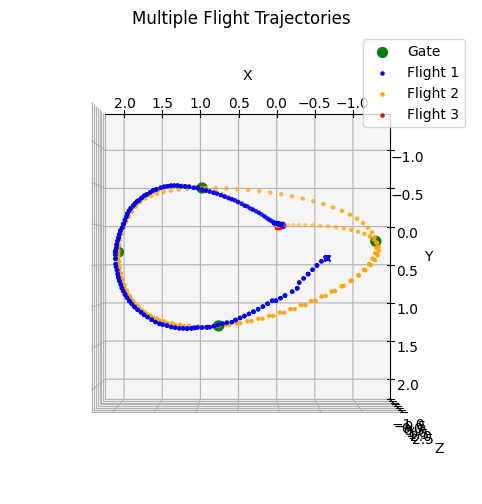

array([ 0.52412836, -0.32494533,  0.29224857])

In [6]:
import os
import sys

# 将上一级目录添加到 sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
import tools
import pandas as pd
import PLOT
import numpy as np

from planning import MotionPlanner3D

cm = 0.01
HOVER_HEIGHT  = 60*cm  
Trajectory = tools.Trajectory_Class('../../position_records.csv')
Planner = MotionPlanner3D(Gate_points = Trajectory.return_gate_points_list(), 
                          time_gain   = 1.8, 
                          speed_limit = 1.4)

print("Total flying time: ",Planner.time_setpoints[-1])
print("Max velocity: ",Planner.result_traj_vel_max, "m/s")
print("Max Velocity: ",np.max(np.linalg.norm(Planner.trajectory_velocities, axis=1)), "m/s")

data_real = PLOT.get_real_pos_list("../../flight_log.csv")
PLOT.plot_multiple_flight_logs([
                                data_real, 
                                Planner.trajectory_setpoints,
                                np.array(Planner.waypoints)],
                                np.array(Planner.Gate_points),
                                type='discrete')

Planner.trajectory_setpoints[10]
Planner.trajectory_velocities[10]

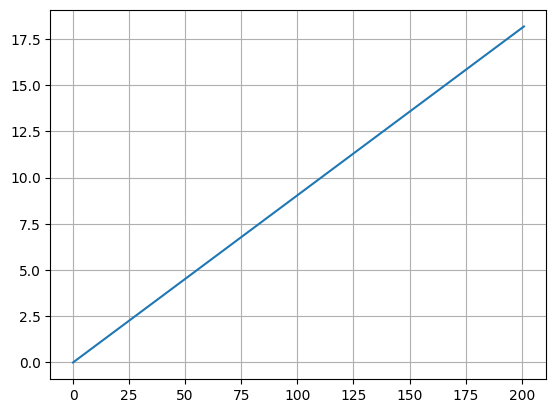

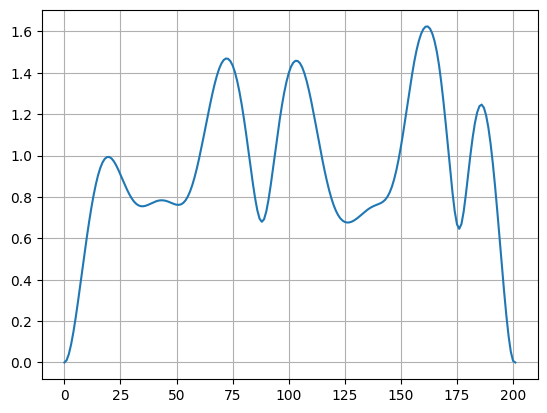

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure
plt.plot(Planner.time_setpoints)
plt.grid()
plt.show()

plt.Figure
plt.plot(np.linalg.norm(Planner.trajectory_velocities, axis=1))
plt.grid()